In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
G=nx.Graph()

In [4]:
inputedges = pd.read_csv('./data/edges.csv')
inputnodes = pd.read_csv('./data/nodes.csv')

for i,r in inputnodes.iterrows():
    G.add_node(r['ID'])
    
dfId = pd.DataFrame()
IdCount = 1
for i,r in inputedges.iterrows():
    G.add_edge(r['Source'],r['Target'], weight=r['Weight'])
    
    #Generate the dataset for graphic nodes in Tableau
    temp = pd.DataFrame(columns=["ID", "Node", "Source","Target", "Weight", "Relationship"])
    s = pd.Series([0,0,0,0,0,0], index=["ID", "Node", "Source","Target", "Weight", "Relationship"])
    temp = temp.append(s, ignore_index=True)
    temp["Node"] = r['Source']
    temp["Source"] = r['Source']
    temp["Target"] = r['Target']
    temp["Weight"] = weight=r['Weight']
    temp["ID"] = IdCount
    temp["Relationship"] = "%s-->%s"%(r['Source'],r['Target'])
    
    dfId = dfId.append(temp)
    temp["Node"] = r['Target']
    dfId = dfId.append(temp)
    IdCount = IdCount + 1

In [5]:
dfId

,ID,Node,Source,Target,Weight,Relationship
0,1,2,2,1,5,2-->1
0,1,1,2,1,5,2-->1
0,2,3,3,1,17,3-->1
0,2,1,3,1,17,3-->1
0,3,4,4,2,2,4-->2
0,3,2,4,2,2,4-->2
0,4,5,5,1,78,5-->1
0,4,1,5,1,78,5-->1


In [6]:
pos=nx.spring_layout(G, k=0.04, iterations=10, scale=100)
#pos=nx.shell_layout(G)
#pos=nx.spectral_layout(G)
#pos=nx.random_layout(G)

In [7]:
nx.set_node_attributes(G,'pos',pos)

In [8]:
labeldict = {}
for i in list(G.nodes()):
    istr = str(i)
    labeldict[i]=istr

In [9]:
# pos[-2] = [100.0, 0.0]
# pos[-1] = [0.0, 100.0]

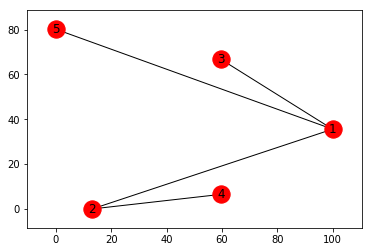

In [10]:
#nx.draw(G, pos=pos)
nx.draw_networkx(G,pos, labels=labeldict)
plt.savefig("network_graph.png")
plt.show()

In [11]:
pos

{1: array([ 100.        ,   35.56511182]),
 2: array([ 13.14385225,   0.        ]),
 3: array([ 59.50845402,  66.82523605]),
 4: array([ 59.69736624,   6.50378596]),
 5: array([  0.        ,  80.13352529])}

In [12]:
positions = pd.DataFrame(pos).transpose()
positions.columns = ['X','Y']

In [13]:
positions["CycleY"] = positions["Y"]

In [14]:
positions["Node"] = positions.index

In [15]:
positions

,X,Y,CycleY,Node
1,100.000000,35.565112,35.565112,1
2,13.143852,0.000000,0.000000,2
3,59.508454,66.825236,66.825236,3
4,59.697366,6.503786,6.503786,4
5,0.000000,80.133525,80.133525,5


In [16]:
result = pd.merge(dfId,positions, on='Node', how='left')

In [17]:
result

,ID,Node,Source,Target,Weight,Relationship,X,Y,CycleY
0,1,2,2,1,5,2-->1,13.143852,0.000000,0.000000
1,1,1,2,1,5,2-->1,100.000000,35.565112,35.565112
2,2,3,3,1,17,3-->1,59.508454,66.825236,66.825236
3,2,1,3,1,17,3-->1,100.000000,35.565112,35.565112
4,3,4,4,2,2,4-->2,59.697366,6.503786,6.503786
5,3,2,4,2,2,4-->2,13.143852,0.000000,0.000000
6,4,5,5,1,78,5-->1,0.000000,80.133525,80.133525
7,4,1,5,1,78,5-->1,100.000000,35.565112,35.565112


In [18]:
result.to_csv('./data/nodepositions.csv', index=False)